## Week 4 - Individual Coding Assignment
### Understanding & Mapping Poverty Across San Francisco
by Rachel Kovinsky

For this week, I'm digging into data from [CalEnviroScreen](https://oehha.ca.gov/calenviroscreen) as part of our group's larger project that looks at the relationship between historic redlining practices and current health disparities across San Francisco. Specifically, I will use this notebook to import, clean, and analyze data focused on poverty rates in San Francisco. 

The dataset from CalEnviroScreen provides a poverty indicator that measures the percent of the population with incomes less than two times the federal poverty level in a given census tract. This indicator is based on data from the ACS (2015-2019). 

Within the context of our project, this poverty indicator is significant because poor communities are more likely to be exposed to environmental hazards and suffer from the resulting health effects. Further, we believe that there is a relationship between historic redlining, current poverty rates, and ongoing health disparities that must be further explored in order to be adequately addressed. 

### Importing & Analyzing the Data

I'll start by importing pandas, then bring in the data set that I'll be using. 

In [4]:
import pandas as pd

In [5]:
pov = pd.read_csv('data/SFPovData.csv')

Let's see how much and what kinds of information are in this dataset!

In [49]:
pov.shape

(195, 7)

Interesting! 195 rows (or census tracts) and 7 columns (or categories of information). I wonder what exactly those columns are? Let's take a look: 

In [6]:
pov.head(3)

,FIPS,totalpop,zip,long,lat,poverty,poverty_pctl
0,6075023200,3972,94124,-122.386139,37.727755,27.3,49.12
1,6075017902,3008,94130,-122.419701,37.861948,66.7,95.90
2,6075023103,2890,94124,-122.375965,37.735632,71.7,97.95


Great, so we know the FIPS code, population count, zipcode, longitude, latitude, percent living in poverty, and poverty percentile for each of the census tracts. Now, let's dig deeper and see the types of data we are working with:

In [51]:
pov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FIPS          195 non-null    int64  
 1   totalpop      195 non-null    int64  
 2   zip           195 non-null    int64  
 3   long          195 non-null    float64
 4   lat           195 non-null    float64
 5   poverty       193 non-null    float64
 6   poverty_pctl  193 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 10.8 KB


Floats and integers it seems! But I'm guessing we're still going to have to deal with the leading zero problem before graphing? Let's confirm: 

In [7]:
pov.FIPS.head(5)

0    6075023200
1    6075017902
2    6075023103
3    6075023001
4    6075023400
Name: FIPS, dtype: int64

Yup, definitely no leading zero there. As we can see above, the leading zero is dropped from the FIPS code. Those zeros are critical, and will be necessary to merge files later on, so I'm going to have to convert the data in certain columns to strings through the function below:

In [8]:
pov = pd.read_csv(
    'data/SFPovData.csv',
    dtype=
    {
        'FIPS':str
    }
)

Now I'll double check to make sure that the code above worked, i.e. that I succesfully added leading zeroes into the FIPS code. 

In [9]:
pov.head()

,FIPS,totalpop,zip,long,lat,poverty,poverty_pctl
0,06075023200,3972,94124,-122.386139,37.727755,27.3,49.12
1,06075017902,3008,94130,-122.419701,37.861948,66.7,95.90
2,06075023103,2890,94124,-122.375965,37.735632,71.7,97.95
3,06075023001,5398,94124,-122.401760,37.735192,30.7,54.95
4,06075023400,3661,94124,-122.390088,37.721593,40.1,69.35


Great, that worked! Now time to clean up the data a bit further by specifying which columns I want to keep.

### Data Cleaning & Calculations

In [10]:
# define columns to keep
columns_to_keep = ['FIPS',
                   'poverty']

The code above indicates that I only want to keep the percent living in poverty and FIPS columns moving forward. Now I need to define this newly condensed data set. I'll call it "pov2"

In [11]:
#new name and assign value
pov2 = pov[columns_to_keep]

Let's double check that that worked...

In [12]:
pov2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   FIPS     195 non-null    object 
 1   poverty  193 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


In [13]:
pov2.sample(2)

,FIPS,poverty
176,06075020300,15.7
15,06075020100,37.3


Perfect! Now we have just the FIPS code and poverty percentage showing up for each census tract. Let's do a few quick calculations to better understand our data set and the information within it:

In [14]:
#find the mean of the percent living in poverty
pov2['poverty'].mean()

21.9559585492228

In [15]:
#find the median of the percent living in poverty
pov2['poverty'].median()

18.0

In [16]:
#now get a quick stats summary
pov2['poverty'].describe()

count    193.000000
mean      21.955959
std       13.993673
min        3.300000
25%       12.500000
50%       18.000000
75%       27.300000
max       71.700000
Name: poverty, dtype: float64

Interesting! This gives me a pretty good indication of the range and average percent living in poverty within census tracts across San Francisco. One thing I can see immediately is just how much of a difference there is between the census tract with the lowest percent (approx 3%) and the tract with the highest percent (approx 72%). I wonder which census tracts those percentages correlate with, and where they are located within the city? Good thing we can do some mapping shortly to figure that out!

### Visualizing & Mapping the Data

Now that I have a good sense for what information is in the dataset, let's start visualizing and mapping the data. 

<AxesSubplot: ylabel='Frequency'>

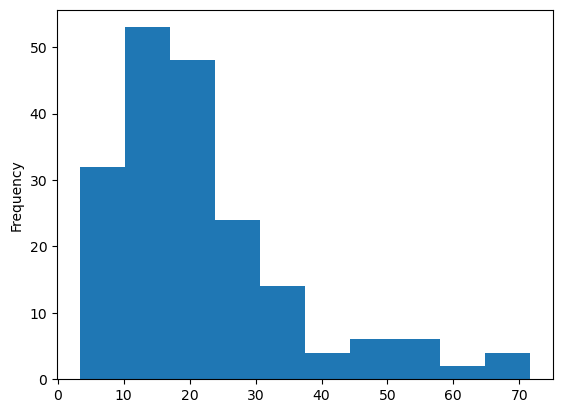

In [17]:
# start by ploting it as a historgram with 10 bins
pov2['poverty'].plot.hist(bins=10)

The bar graph above gives us a good sense for the frequency of poverty percentages and their ranges. Now let's see this information in a blox plot: 

<AxesSubplot: >

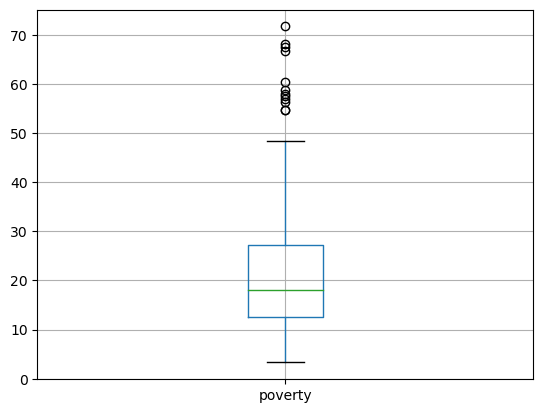

In [18]:
# box plot time
pov2.boxplot(column=['poverty'])

Now, what I really want to see is the three census tracts with the highest and lowest percent of residents living in poverty, respectively. Time to sort values and see those listings: 

In [19]:
pov_sorted = pov2.sort_values(by='poverty',ascending = True)

In [20]:
pov_sorted[['FIPS','poverty']].head(3)

,FIPS,poverty
182,06075021200,3.3
146,06075013400,4.8
153,06075013200,5.2


Hmmm I wonder where in the city these census tracts are located? I'll have to wait until we map but I'll keep this in mind!

In [21]:
pov_sorted = pov2.sort_values(by='poverty',ascending = False)

In [22]:
pov_sorted[['FIPS','poverty']].head(3)

,FIPS,poverty
2,06075023103,71.7
43,06075061100,68.1
59,06075033201,67.5


Next, I'll put the 5 census tracts with the highest poverty rates into a bar graph to better visualize. 

<AxesSubplot: xlabel='FIPS'>

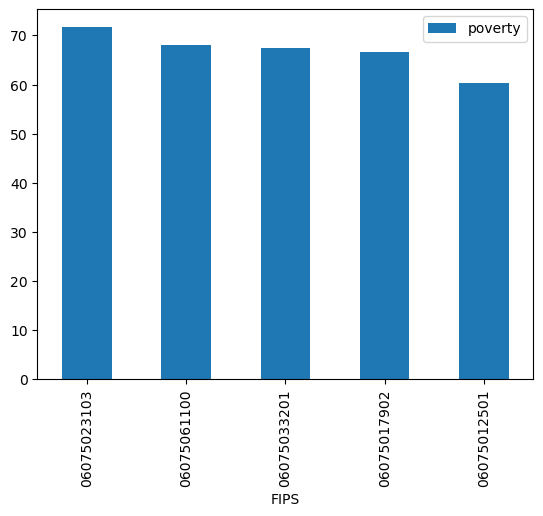

In [23]:
# plot it
pov_sorted.head(5).plot.bar(x='FIPS',
                            y='poverty')

<AxesSubplot: title={'center': 'SF Census Tracts with the Highest Poverty Rates'}, ylabel='FIPS'>

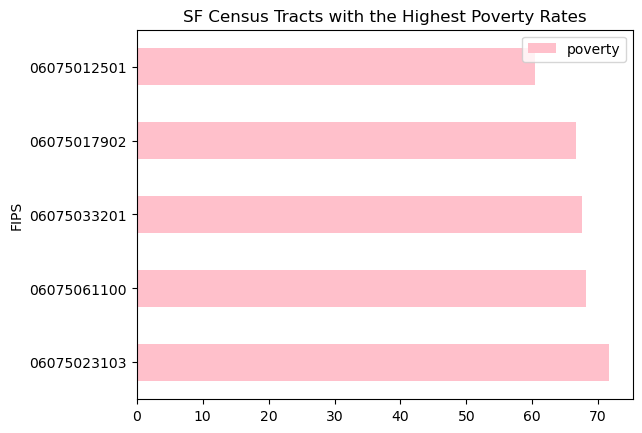

In [24]:
# we can make the bar chart look a bit prettier
pov_sorted.head(5).plot.barh(x='FIPS',
                            y='poverty', 
                            title='SF Census Tracts with the Highest Poverty Rates',
                            color='pink')

Out of curiousity, I wonder how many census tracts have a poverty indicator over 50%? 

In [70]:
pov2[pov2['poverty']>50]

,FIPS,poverty
1,06075017902,66.7
2,06075023103,71.7
9,06075012502,56.4
14,06075012501,60.4
20,06075012301,54.7
27,06075010700,56.9
39,06075980501,58.8
43,06075061100,68.1
47,06075012202,54.6
59,06075033201,67.5


Finally, let's map all of the information above to get a better understanding for the (likely inequitable) distribution of poverty rates across San Francisco. 

In [25]:
# import the geopandas library
import geopandas as gpd

Time to bring in my census tract spatial data!

In [40]:
# bring in the geojson file with census tracts
tracts=gpd.read_file('data/2010CTs.geojson')
# see what the data looks like
tracts.head()

,statefp10,mtfcc10,name10,intptlat10,awater10,namelsad10,funcstat10,aland10,geoid10,tractce10,intptlon10,countyfp10,geometry
0,06,G5020,165,+37.7741958,0,Census Tract 165,S,370459,06075016500,016500,-122.4477884,075,"MULTIPOLYGON (((-122.44647 37.77580, -122.4447..."
1,06,G5020,164,+37.7750995,0,Census Tract 164,S,309097,06075016400,016400,-122.4369729,075,"MULTIPOLYGON (((-122.44034 37.77658, -122.4398..."
2,06,G5020,163,+37.7760456,0,Census Tract 163,S,245867,06075016300,016300,-122.4295509,075,"MULTIPOLYGON (((-122.42915 37.77801, -122.4289..."
3,06,G5020,161,+37.7799831,0,Census Tract 161,S,368901,06075016100,016100,-122.4286631,075,"MULTIPOLYGON (((-122.42891 37.77804, -122.4291..."
4,06,G5020,160,+37.7823363,0,Census Tract 160,S,158236,06075016000,016000,-122.4224838,075,"MULTIPOLYGON (((-122.42042 37.78058, -122.4203..."


Lots of  information, but that looks correct! The data set clearly has the census tract, state, and county codes - and the geoid/geometry data that we need. Let's try plotting it on a simple xy axis: 

<AxesSubplot: >

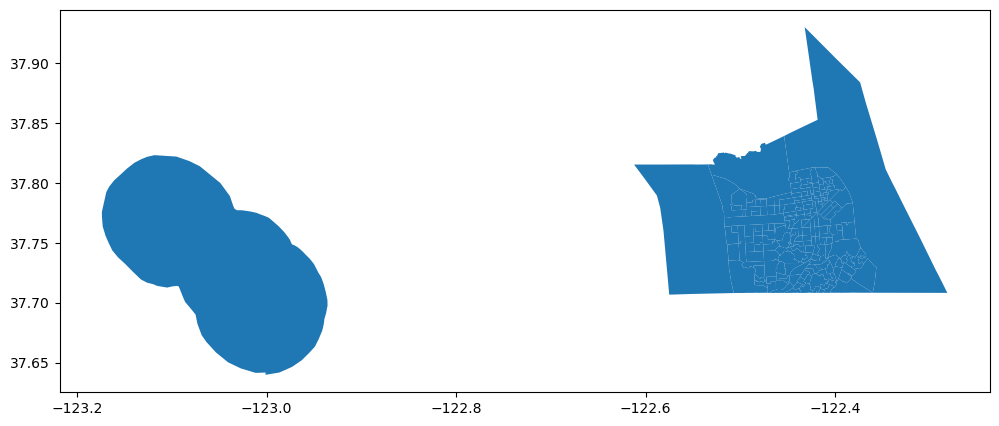

In [41]:
# plot it!
tracts.plot(figsize=(12,10))

In [42]:
# tell me more about this dataset
tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   statefp10   197 non-null    object  
 1   mtfcc10     197 non-null    object  
 2   name10      197 non-null    object  
 3   intptlat10  197 non-null    object  
 4   awater10    197 non-null    object  
 5   namelsad10  197 non-null    object  
 6   funcstat10  197 non-null    object  
 7   aland10     197 non-null    object  
 8   geoid10     197 non-null    object  
 9   tractce10   197 non-null    object  
 10  intptlon10  197 non-null    object  
 11  countyfp10  197 non-null    object  
 12  geometry    197 non-null    geometry
dtypes: geometry(1), object(12)
memory usage: 20.1+ KB


I only really need FIPS codes and the geometry column, so let's subset the data and specify that we want to keep just those columns. 

In [43]:
tracts = tracts[['tractce10','geometry']]
tracts.head()

,tractce10,geometry
0,016500,"MULTIPOLYGON (((-122.44647 37.77580, -122.4447..."
1,016400,"MULTIPOLYGON (((-122.44034 37.77658, -122.4398..."
2,016300,"MULTIPOLYGON (((-122.42915 37.77801, -122.4289..."
3,016100,"MULTIPOLYGON (((-122.42891 37.77804, -122.4291..."
4,016000,"MULTIPOLYGON (((-122.42042 37.78058, -122.4203..."


Great - but we still need the full FIPS codes (not just the census tract number) before we can fully merge the data sets. Good news is that we can use a relatively simple code and formula to add the state code (06) and county code (075):

In [46]:
# create a FIPS column before merging
tracts['FIPS'] ='06' + '075' + tracts['tractce10']

In [47]:
tracts.head()

,tractce10,geometry,FIPS
0,016500,"MULTIPOLYGON (((-122.44647 37.77580, -122.4447...",06075016500
1,016400,"MULTIPOLYGON (((-122.44034 37.77658, -122.4398...",06075016400
2,016300,"MULTIPOLYGON (((-122.42915 37.77801, -122.4289...",06075016300
3,016100,"MULTIPOLYGON (((-122.42891 37.77804, -122.4291...",06075016100
4,016000,"MULTIPOLYGON (((-122.42042 37.78058, -122.4203...",06075016000


That worked! The FIPS code looks great, and even includes the leading zero. Time to merge the two data sets and then map: 

In [48]:
# create a new dataframe based on the join, tracts is spatial data so it must come first
tracts_income=tracts.merge(pov2,on="FIPS")

In [49]:
# make sure that the merge worked
tracts_income.head(3)

,tractce10,geometry,FIPS,poverty
0,016500,"MULTIPOLYGON (((-122.44647 37.77580, -122.4447...",06075016500,18.8
1,016400,"MULTIPOLYGON (((-122.44034 37.77658, -122.4398...",06075016400,7.8
2,016300,"MULTIPOLYGON (((-122.42915 37.77801, -122.4289...",06075016300,14.0


In [50]:
tracts_income.shape

(195, 4)

Interesting, it looks like we only have 156 census tracts in this joined data set. I know that the census tract file had well over 200 census tracts included (244 entries to be exact) so I wonder why this is the case. Maybe it's because the CalEnviro data is from the 2015-2019 ACS but the census tract data is from the 2020 Census? Do census tracts change that drastically over time? And where can I find the census tract data from 2015-2019? These are questions I'll have to ask in office hours. 

For now, let's try mapping this data to at least get a sense for the distribution of poverty rates across the city: 

<AxesSubplot: >

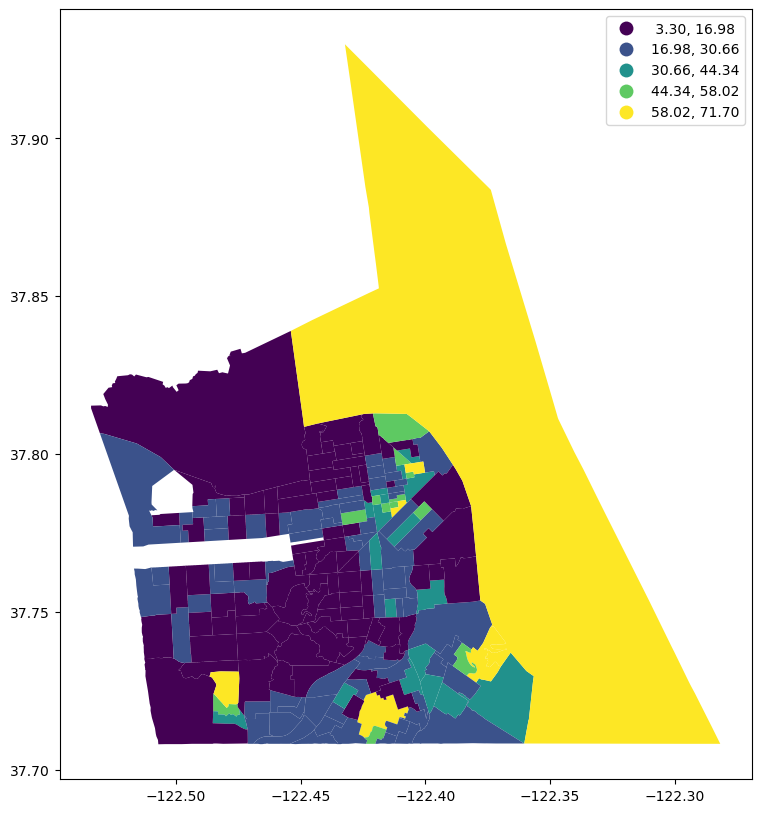

In [51]:
#generate a choropleth map based on the merged dataset 
tracts_income.plot(figsize=(12,10),
                 column='poverty',
                 legend=True, 
                 scheme='equal_interval')

So there are definitely some census tracts missing in this map, but it's still a pretty good reflection of the inequitable distrubtion of poverty across San Francisco. From first glance, it's clear that the southeast corner of the city has the highest poverty rates. This is what I would expect given the history and enviornmental injustices that have transpired in that corner of the city. The lowest poverty rates are in the northern and center parts of the city. That also checks out. 

Now, let's see if we can make this map just a bit prettier and more interactive through a folium map: 

In [53]:
import folium

In [54]:
m = folium.Map(location=[37.7,-122.4], 
               zoom_start = 11,
               tiles='CartoDB positron', 
               attribution='CartoDB')

In [55]:
# plot choropleth over the base map
folium.Choropleth(
                  geo_data=tracts_income, # geo data
                  data=tracts_income, # data          
                  key_on='feature.properties.FIPS', # key, or merge column
                  columns=['FIPS', 'poverty'], # [key, value]
                  fill_color='BuPu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.5, # line opacity (of the border)
                  legend_name='Percent of Population Living Below Twice the Federal Poverty Level').add_to(m)    # name on the legend
m

Really interesting and exciting to see this information mapped! That's all for now, but more to come as our project continues to progress and pull in more data and visualizations throughout the quarter. 